## Задача 2. Сравнение методов классификации
Андрей Плахтий Дмитриевич, 22.М08-мм

- [x] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [x] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [x] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [x] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [x] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [x] * (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- [x] * (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.


In [218]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Взять данные для предсказания заболеваний сердца

In [219]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).

In [220]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

In [222]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

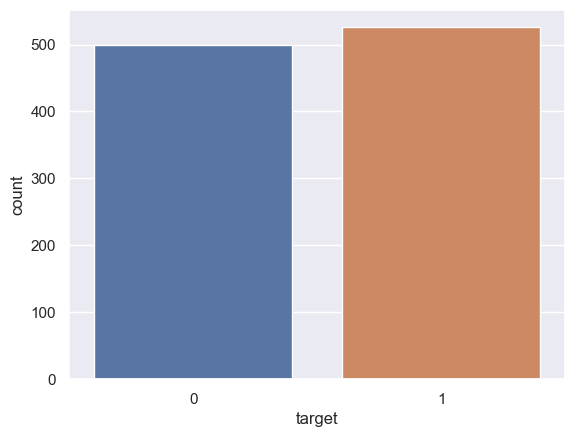

In [223]:
sns.countplot(x="target", data=df)
plt.show()

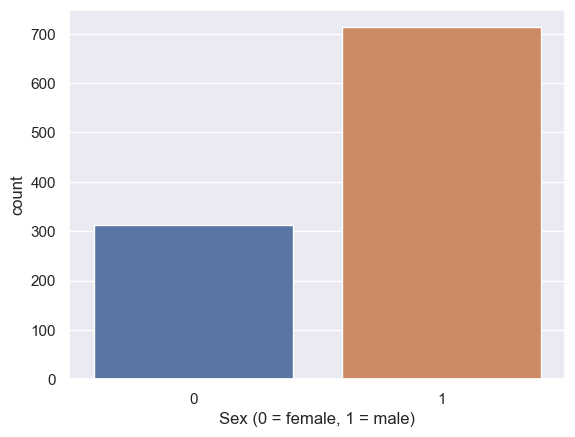

In [224]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [225]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


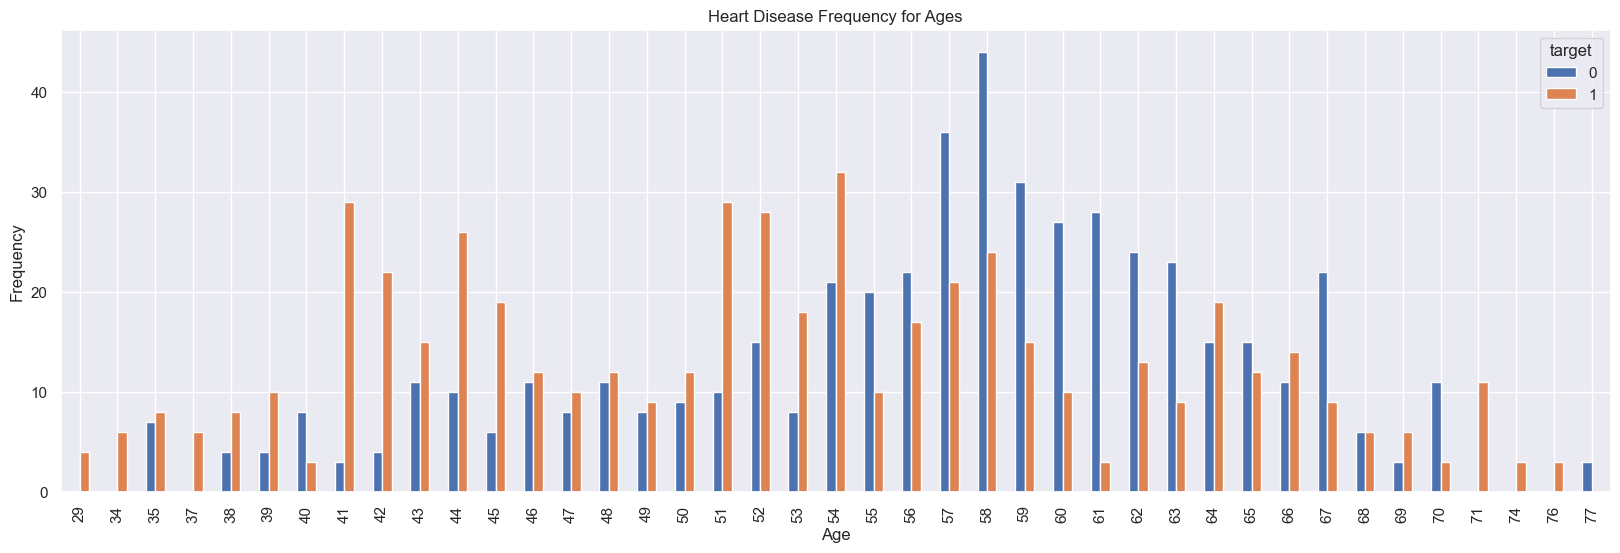

In [226]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

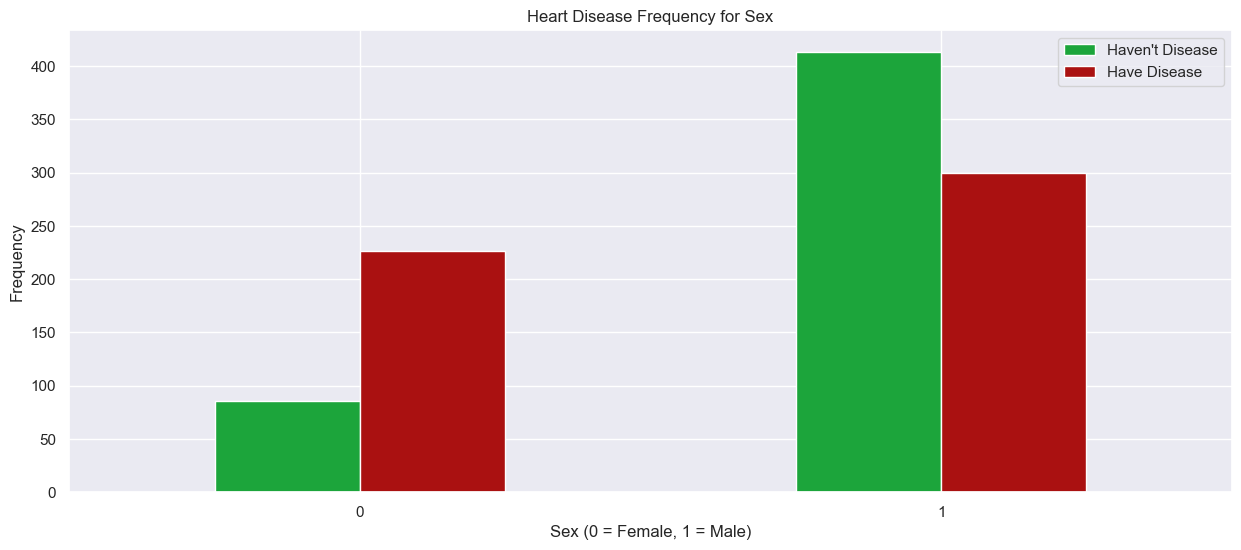

In [227]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

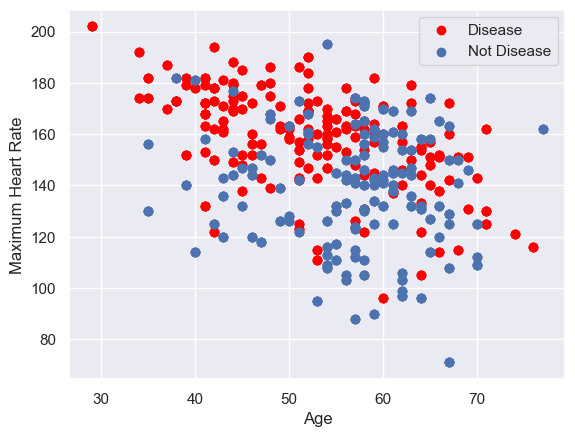

In [228]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [229]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [230]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.

In [231]:
def calculate_euclidean(sample1, sample2):
    distance = 0.0
    for i in range(len(sample1)):
        distance += (sample1[i] - sample2[i]) ** 2
    return sqrt(distance)


class ImplKnn(BaseEstimator, ClassifierMixin):

    def __init__(self, k = [5, 50]):
        self.k = k

    def fit(self, X_train, y_train):
        self.X = X_train
        self.y = y_train

    def predict(self, X_test):
        predictions=[]
        for test_sample in X_test:
            neighbors=self.nearest_neighbors(test_sample)
            labels=[sample for sample in neighbors]
            prediction=max(labels, key=labels.count)
            predictions.append(prediction)
        return predictions

    def nearest_neighbors(self, test_sample):
        distances=[]
        for xx, yy in zip(self.X, self.y):
            distances.append((yy, calculate_euclidean(xx, test_sample)))
        distances.sort(key = lambda x : [1])
        neighbors=[]
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors

Реализовать еще один из методов классификации и добавить его в сравнение.

In [232]:
class ImplLogisticRegression(BaseEstimator, ClassifierMixin):

    def __init__(self, lr=0.1, epochs=100, random_state=None):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X_train, y_train):
        np.random.seed(self.random_state)
        self.w = np.random.randn(np.shape(X_train)[1], )
        self.b = 0
        for i in range(self.epochs):
            gradient, b = self.step(X_train, y_train)
            self.update(gradient, b)

    def predict(self, X_test, threshold=0.5):
        probs = 1 / ( 1 + np.exp( -( X_test.dot(self.w) + self.b)))
        if threshold:
            probs[probs<threshold] = 0
            probs[probs>0] = 1
        return probs

    def step(self, X, y):
        err = np.reshape((self.predict(X, 0) - y.T), np.shape(X)[0])
        return np.dot(X.T, err)/np.shape(X)[0], np.sum(err) / np.shape(X)[0]

    def update(self, w, b):
        self.w -= self.lr * w
        self.b -= self.lr * b

Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).

In [233]:
def fit_model(clazz, parameters):
    model = clazz()
    sh = HalvingGridSearchCV(model, parameters, cv=5, scoring='f1',
                        factor=2, min_resources=20).fit(X_train_scaled, y_train)
    return model.__class__.__name__, sh.best_estimator_

def add_model(pair, models):
    models[pair[0]] = pair[1]

In [234]:
y = df['target']
X = df.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [235]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [236]:
models = {}
add_model(fit_model(ImplKnn, {'k': [7, 70]}), models)
add_model(fit_model(ImplLogisticRegression, {'lr':[0.07, 0.01, 0.001], 'epochs': [100, 1000, 7000]}), models)
add_model(fit_model(LogisticRegression, {'max_iter': [100, 1000], 'C': [1, 0.5, 0.1]}), models)
add_model(fit_model(SVC, {'C':[1, 0.5, 0.1]}), models)
add_model(fit_model(KNeighborsClassifier,  {'n_neighbors': [7, 70]}), models)
add_model(fit_model(GaussianNB, {}), models)
add_model(fit_model(DecisionTreeClassifier, {'splitter': ["best", "random"]}), models)

In [237]:
print(models)

{'ImplKnn': ImplKnn(k=70), 'ImplLogisticRegression': ImplLogisticRegression(epochs=1000, lr=0.07), 'LogisticRegression': LogisticRegression(C=0.1), 'SVC': SVC(C=1), 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=70), 'GaussianNB': GaussianNB(), 'DecisionTreeClassifier': DecisionTreeClassifier(splitter='random')}


Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

In [238]:
predict_results = {}
for name, model in models.items():
    predicted = model.predict(X_test_scaled);
    predict_results[name] = predicted
    print(name, ": ", f1_score(predicted, y_test))

ImplKnn :  0.6520787746170679
ImplLogisticRegression :  0.805111821086262
LogisticRegression :  0.8141025641025642
SVC :  0.8967741935483872
KNeighborsClassifier :  0.8231511254019291
GaussianNB :  0.7371134020618556
DecisionTreeClassifier :  0.9794520547945206


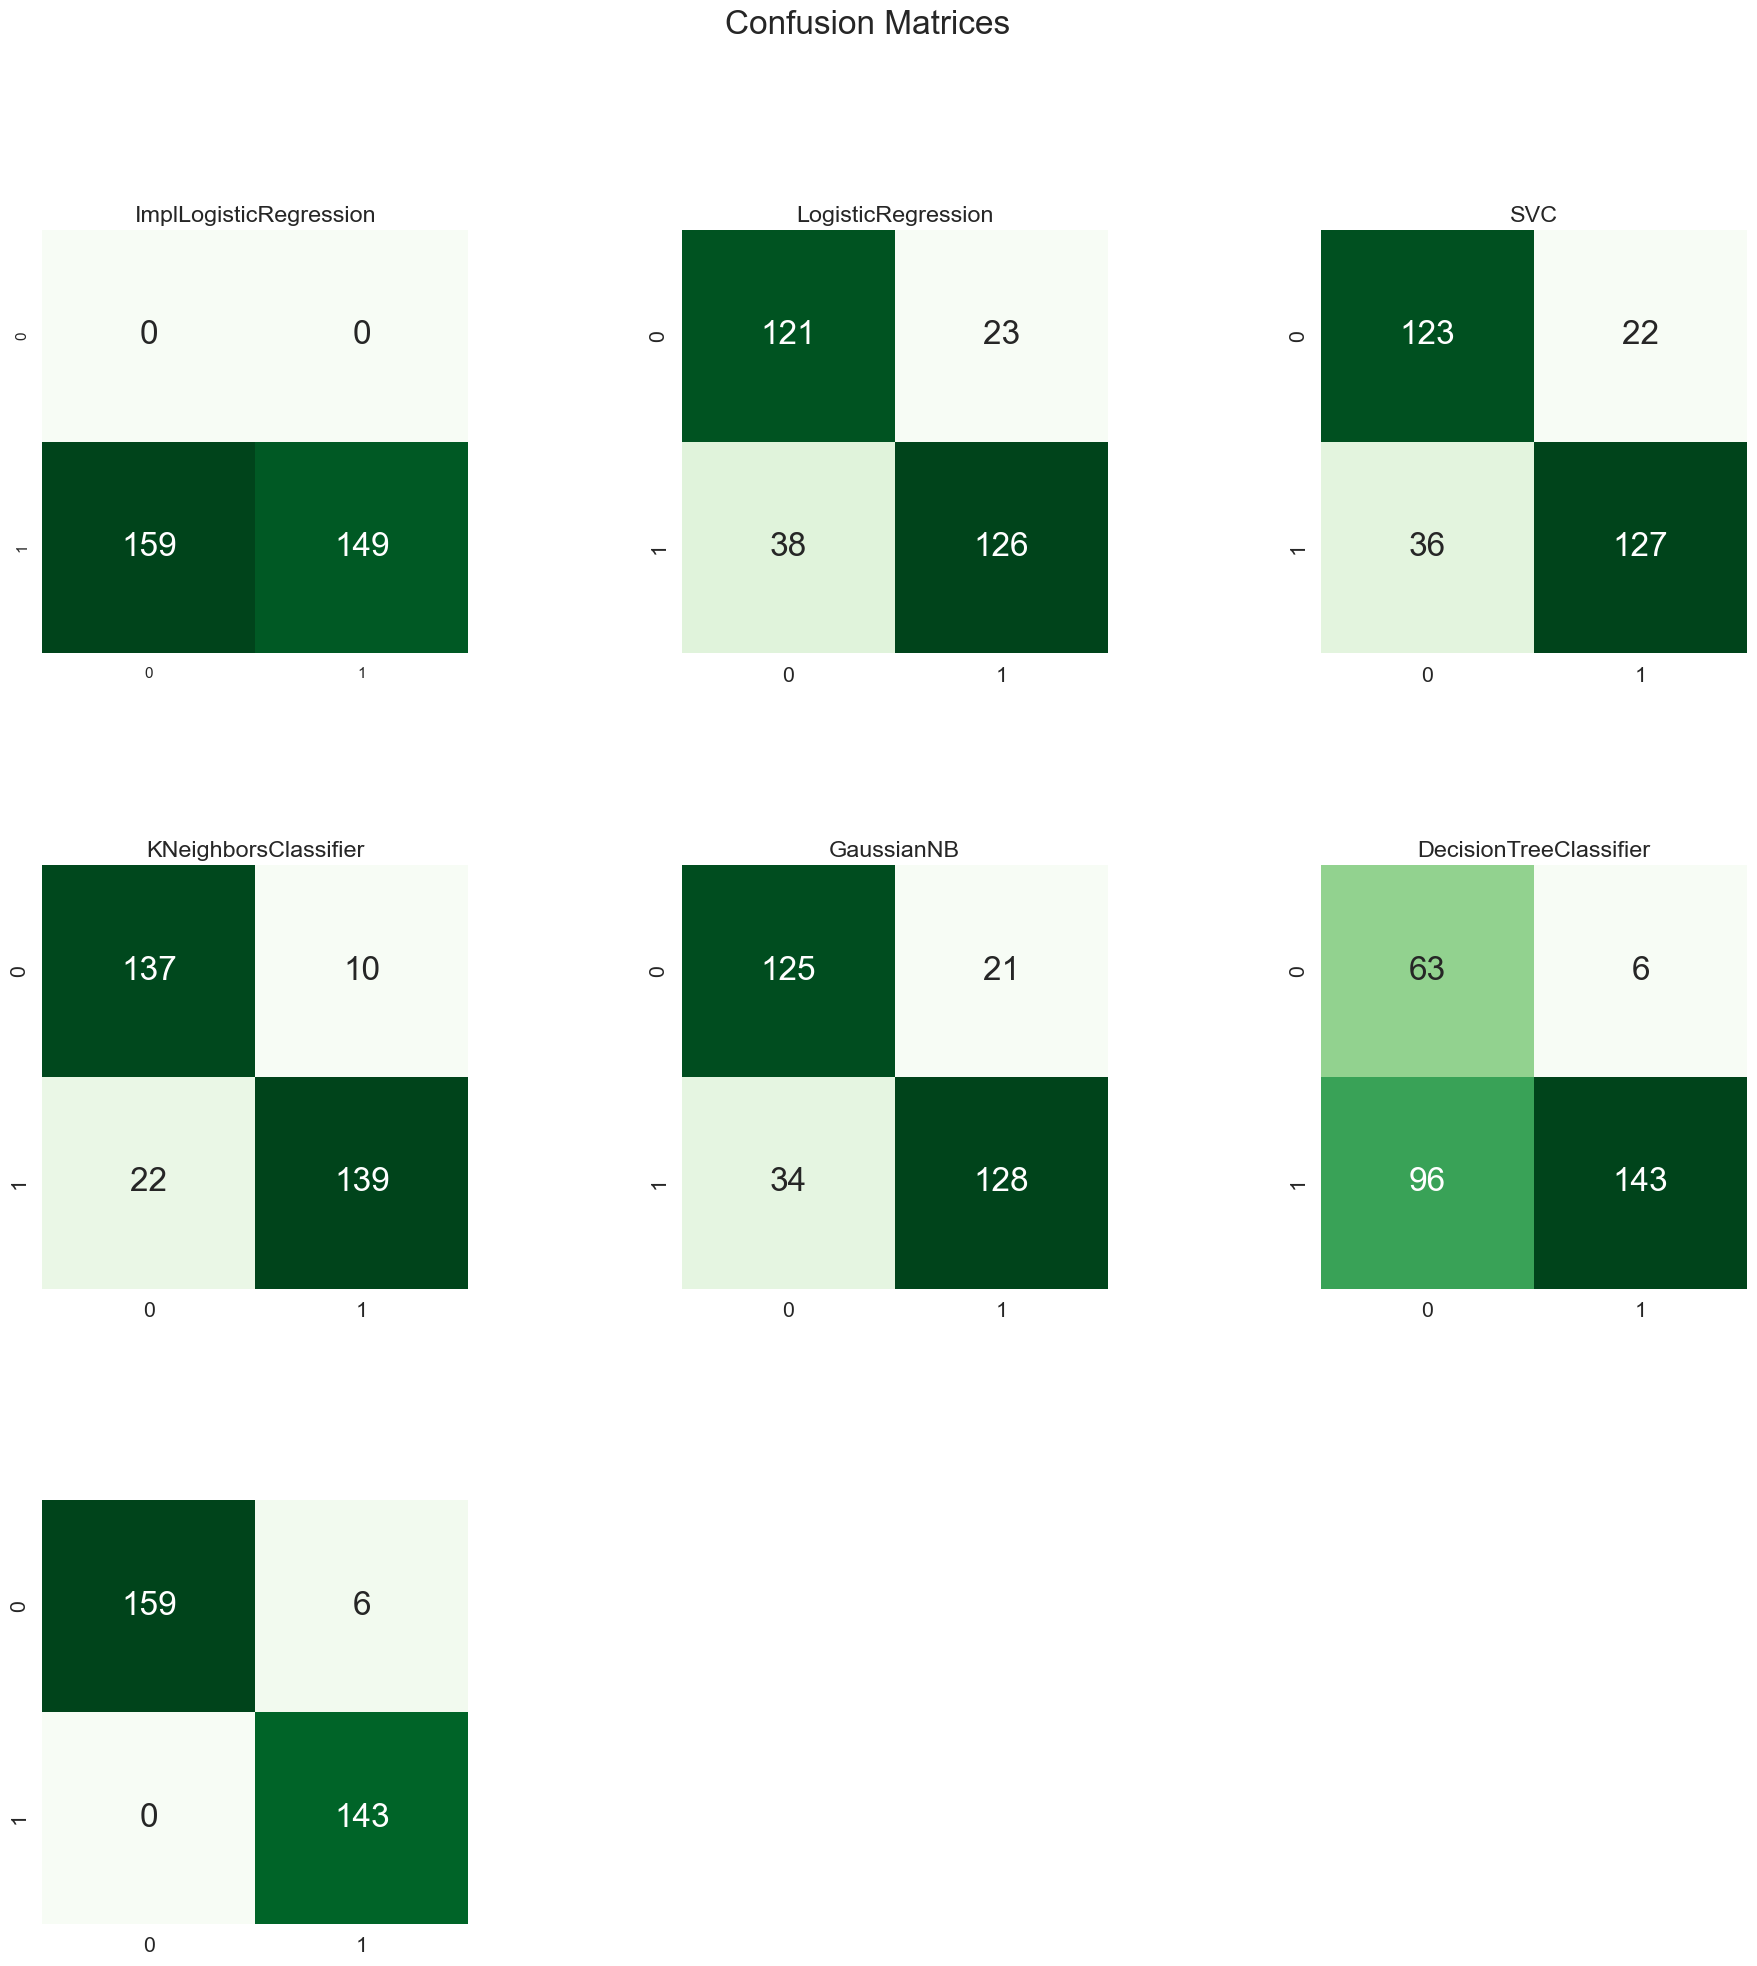

In [239]:
plt.figure(figsize=(22, 22))
plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.5, hspace= 0.5)

num = 1
for key in predict_results.keys():
    plt.title(key)
    plt.subplot(3, 3, num)
    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix(predict_results[key], y_test), annot = True, cmap = "Greens", fmt = "d",
                cbar=False, annot_kws={"size": 24})
    num += 1

sns.set(font_scale=1)

## Вывод:
Модель DecisionTreeClassifier показала лучший результат среди других. Это связано с подбором гиперпараметров.

In [240]:
for value in models.values():
    print(value)

ImplKnn(k=70)
ImplLogisticRegression(epochs=1000, lr=0.07)
LogisticRegression(C=0.1)
SVC(C=1)
KNeighborsClassifier(n_neighbors=70)
GaussianNB()
DecisionTreeClassifier(splitter='random')


Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [241]:
df_titanic = pd.read_csv('titanic_train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [242]:
df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

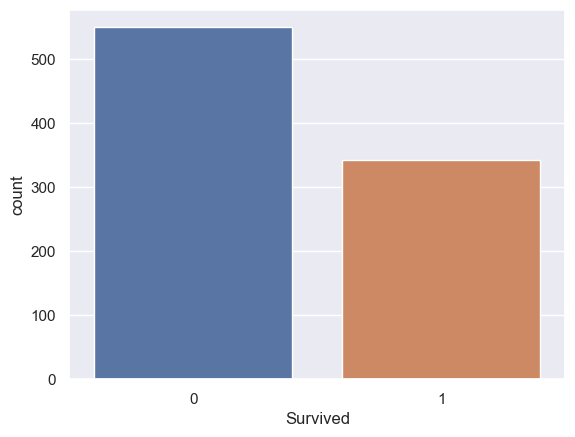

In [243]:
sns.countplot(x='Survived', data=df_titanic);

In [244]:
df_titanic['Survived'].mean()

0.3838383838383838

In [245]:
df_titanic.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

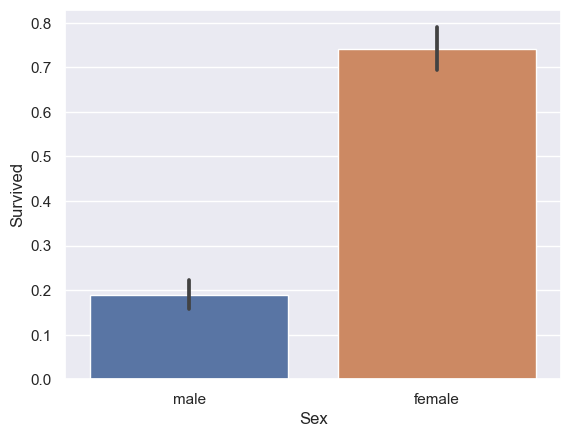

In [246]:
sns.barplot(x = "Sex", y = "Survived", data = df_titanic);

In [247]:
df_titanic['Age_category'] = 0
df_titanic.loc[df_titanic['Age'] <= 16, 'Age_category'] = 0
df_titanic.loc[(df_titanic['Age'] > 16) & (df_titanic['Age'] <= 32), 'Age_category'] = 1
df_titanic.loc[(df_titanic['Age'] > 32) & (df_titanic['Age'] <= 48), 'Age_category'] = 2
df_titanic.loc[(df_titanic['Age'] > 48) & (df_titanic['Age'] <= 64), 'Age_category'] = 3
df_titanic.loc[df_titanic['Age'] > 64, 'Age_category'] = 4
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [248]:
df_titanic.drop(['Name', 'Age', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
df_titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
df_titanic['Embarked'].fillna('S', inplace=True)
df_titanic['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
df_titanic.head()

,Survived,Pclass,Sex,Embarked,Age_category
0,0,3,0,0,1
1,1,1,1,1,2
2,1,3,1,0,1
3,1,1,1,0,2
4,0,3,0,0,2


In [249]:
y = df_titanic['Survived']
X = df_titanic.drop(columns=['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {}
add_model(fit_model(ImplKnn, {'k': [3, 30]}), models)
add_model(fit_model(ImplLogisticRegression, {'lr': [0.07, 0.01, 0.001], 'epochs': [100, 1000, 7000]}), models)
add_model(fit_model(LogisticRegression, {'max_iter': [100, 1000], 'C': [1, 0.5, 0.1]}), models)
add_model(fit_model(SVC, {'C': [1, 0.5, 0.1]}), models)
add_model(fit_model(KNeighborsClassifier, {'n_neighbors': [7, 70]}), models)
add_model(fit_model(GaussianNB, {}), models)
add_model(fit_model(DecisionTreeClassifier, {'splitter': ["best", "random"]}), models)

In [250]:
print(models)

{'ImplKnn': ImplKnn(k=30), 'ImplLogisticRegression': ImplLogisticRegression(epochs=1000, lr=0.01), 'LogisticRegression': LogisticRegression(C=0.5, max_iter=1000), 'SVC': SVC(C=1), 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=70), 'GaussianNB': GaussianNB(), 'DecisionTreeClassifier': DecisionTreeClassifier(splitter='random')}


In [251]:
predict_results = {}
for name, model in models.items():
    predicted = model.predict(X_test_scaled);
    predict_results[name] = predicted
    print(name, ": ", f1_score(predicted, y_test))

ImplKnn :  0.0
ImplLogisticRegression :  0.7264150943396227
LogisticRegression :  0.7272727272727272
SVC :  0.7234042553191489
KNeighborsClassifier :  0.7150259067357513
GaussianNB :  0.7358490566037735
DecisionTreeClassifier :  0.71


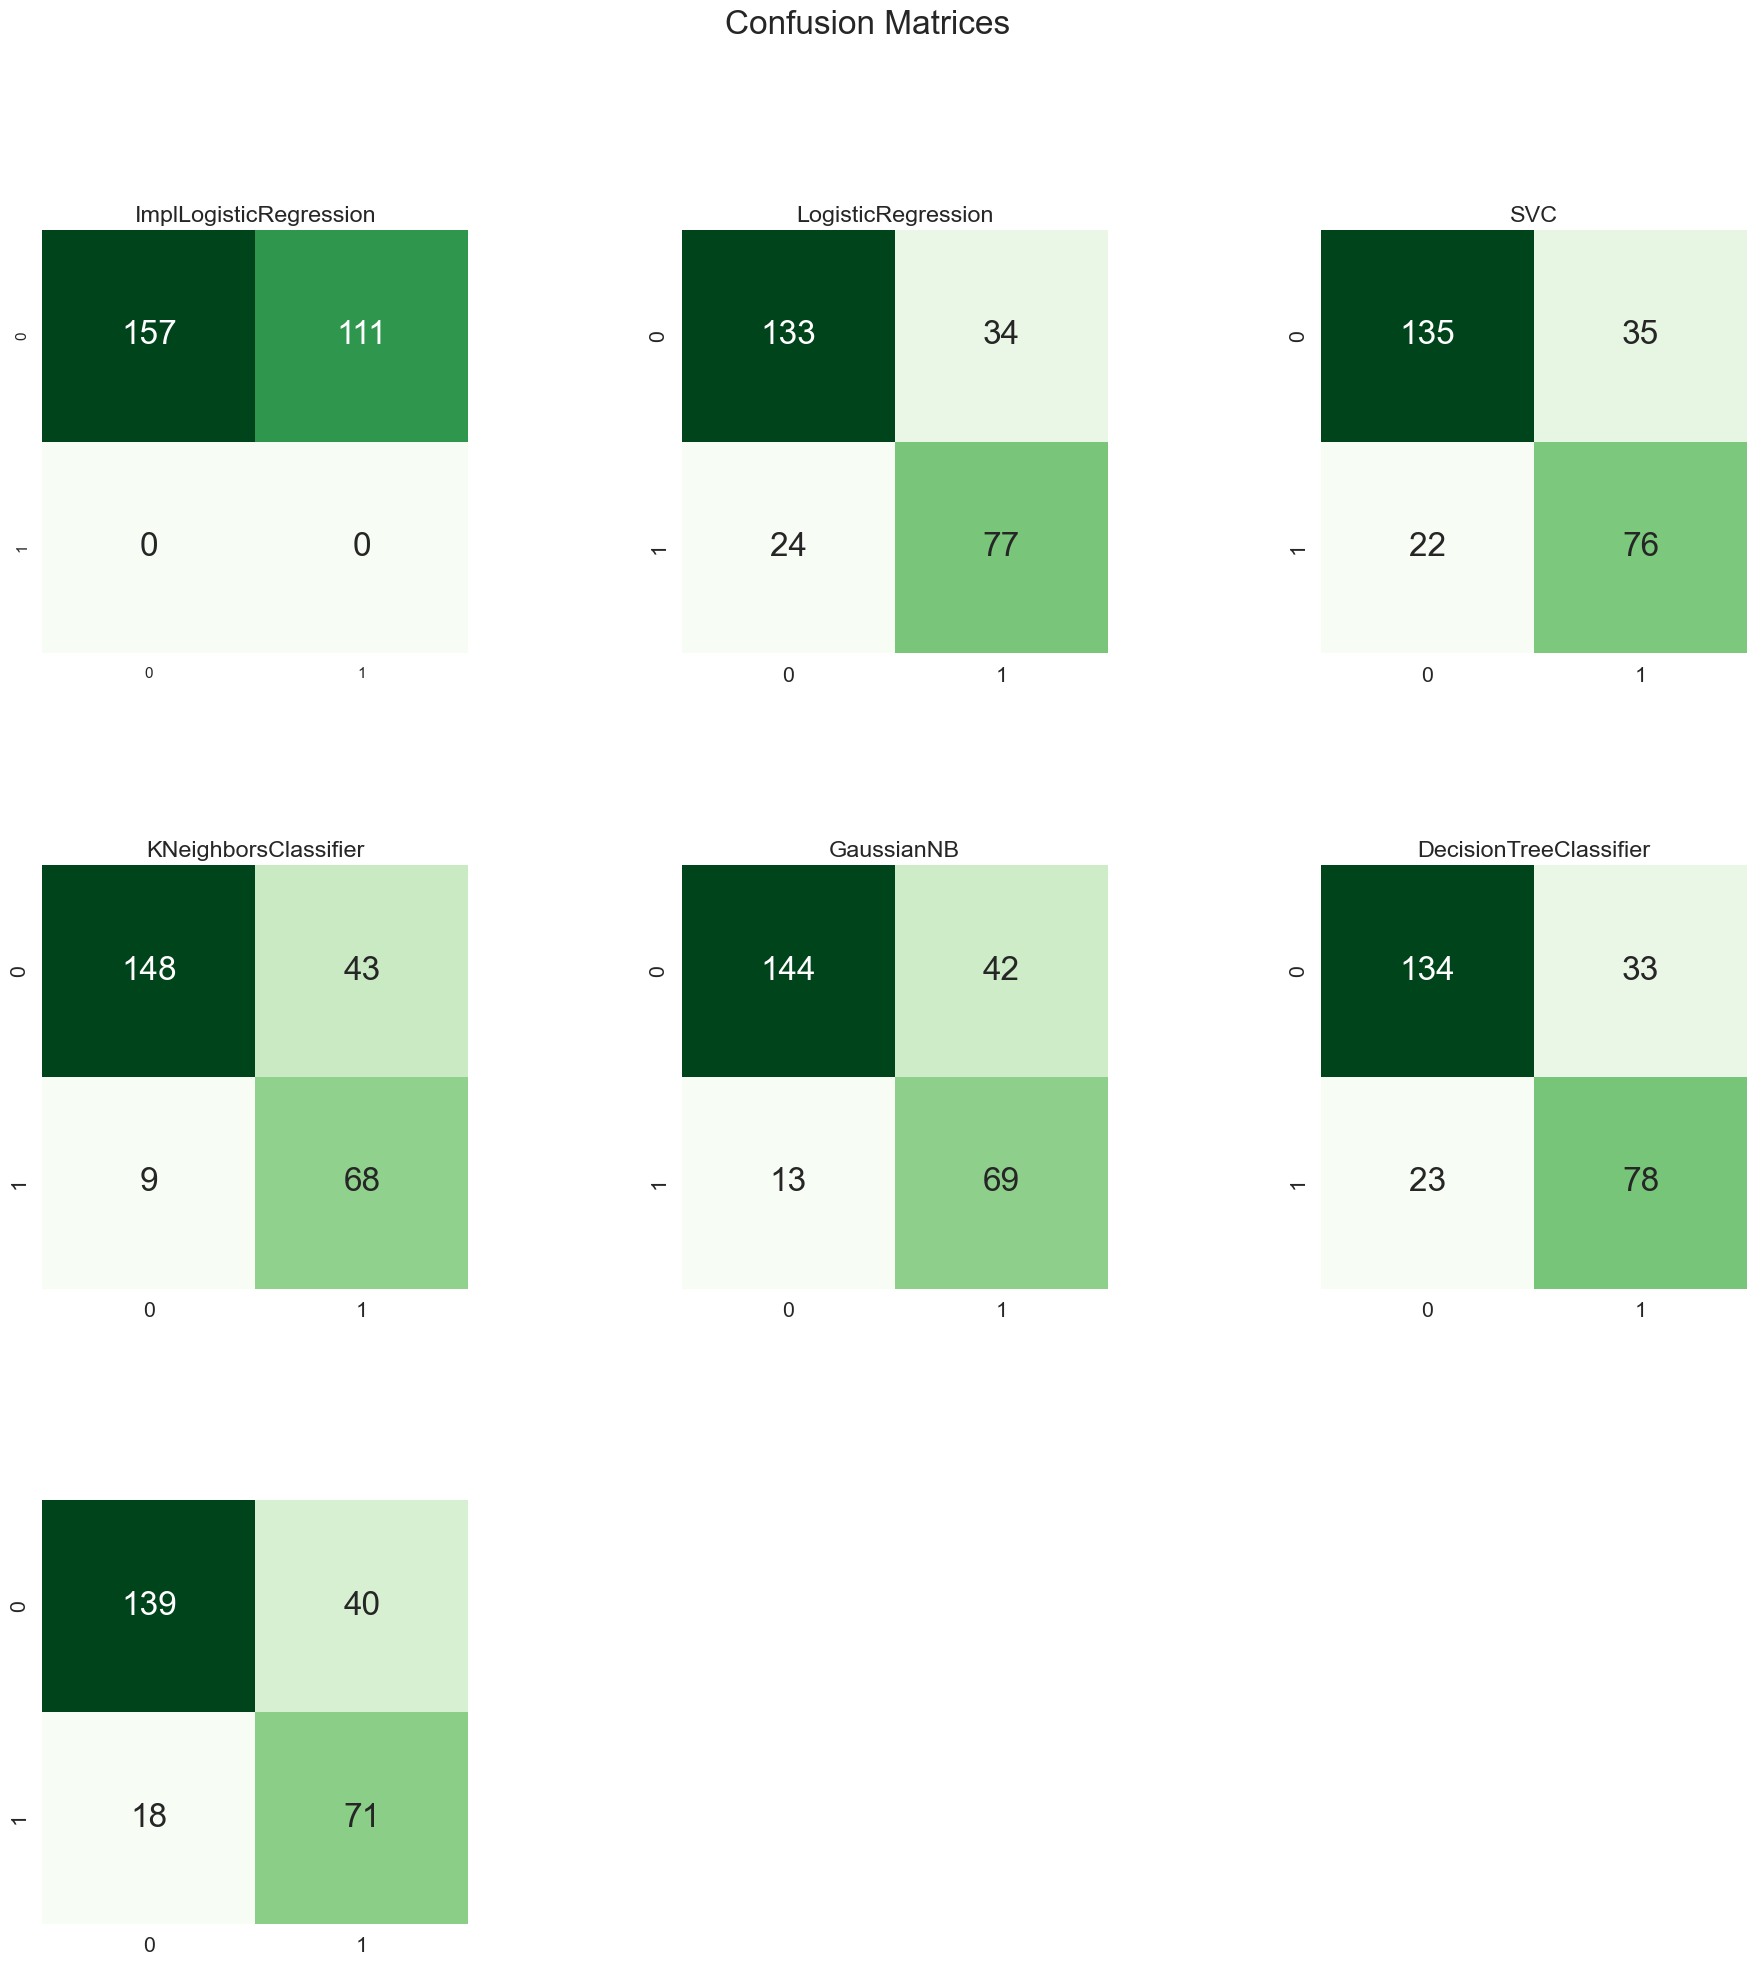

In [252]:
plt.figure(figsize=(22, 22))
plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.5, hspace= 0.5)

num = 1
for key in predict_results.keys():
    plt.title(key)
    plt.subplot(3, 3, num)
    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix(predict_results[key], y_test), annot = True, cmap = "Greens", fmt = "d",
                cbar=False, annot_kws={"size": 24})
    num += 1

sns.set(font_scale=1)